In [1]:
from utils import train_and_search, plot_results, handle_param_names, show_value_counts, plot_grid, plot_cf_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from imblearn.under_sampling import RandomUnderSampler

Mean ROC AUC: 0.933


In [2]:
df = pd.read_csv('../dataset/bank-preprocessed.csv')

In [3]:
X = df.drop('y', axis=1)
y = df['y']
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

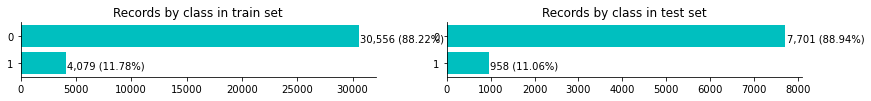

<Figure size 360x720 with 0 Axes>

<Figure size 360x720 with 0 Axes>

In [4]:
train_plotting_infos = [{'serie': y_train, 'title': 'Records by class in train set'},
                        {'serie': y_test, 'title': 'Records by class in test set'}]
plot_grid([[show_value_counts, plotting_info] for plotting_info in train_plotting_infos], 
            n_cols=2, width_scale=7, height_scale=1)

## Base Line

In [5]:
rus = RandomUnderSampler(random_state=SEED)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

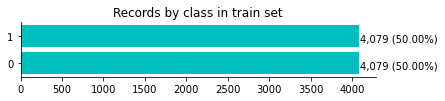

<Figure size 360x720 with 0 Axes>

In [6]:
train_plotting_infos = [{'serie': y_train_resampled, 'title': 'Records by class in train set'}]
plot_grid([[show_value_counts, plotting_info] for plotting_info in train_plotting_infos], 
            n_cols=2, width_scale=7, height_scale=1)

In [7]:
base_model = RandomForestClassifier(random_state=SEED)
base_model.fit(X_train_resampled, y_train_resampled)
y_pred = base_model.predict(X_test)
base_score = f1_score(y_test, y_pred, average='micro')
base_score

0.8335835546829888

## Fine-tuning

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


In [24]:
def train_and_search(model, param_grid, X_train, y_train, metric="f1_micro", seed=42, search_type="grid", n_jobs=-1, verbose=10, 
                     sampler=None, folds=None, n_repeats=3):
    if not folds:
        folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
    # kf = KFold(n_splits=10, random_state=seed, shuffle=True) 

    # using a specif pipeline for unbalanced datasets and undersampling of the most frequent classes
    imba_pipeline = Pipeline(steps=[
                                    ('sampler', sampler),
                                    ('model', model)
                                ]
                            )   

    new_param_grid = {'model__' + key: param_grid[key] for key in param_grid}

    # params = {"estimator": imba_pipeline,
    params = {"estimator": imba_pipeline,
              "param_grid": new_param_grid,
              "scoring": metric,
              "n_jobs": n_jobs,
              "verbose": verbose,
              "return_train_score": True,
              "cv": folds
            }

    if search_type == "grid":
        search = GridSearchCV(**params)
    else:
        search = RandomizedSearchCV(**params)

    train_0, train_1 = len(y_train_fold[y_train_fold==0]), len(y_train_fold[y_train_fold==1])
    val_0, val_1 = len(y_val_fold[y_val_fold==0]), len(y_val_fold[y_val_fold==1])
    print('>Before resampler - Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, val_0, val_1))

    search.fit(X_train, y_train)
    print(f'Best parameters: {search.best_params_}')
    results = pd.DataFrame(search.cv_results_)
    return search, results

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_cf_matrix(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    f, ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="black", ax=ax, cmap="YlGnBu",
                fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

KFold(n_splits=10, random_state=42, shuffle=True) com SMOTE


In [ ]:
model_01 = RandomForestClassifier(random_state=SEED)
grid_parameters = {
    "n_estimators": range(100, 300, 20),
    "criterion": ["gini", "entropy"],
    
    "max_features": ["auto"],
}

grid_search_01, results_01 = train_and_search(model_01, grid_parameters, X_train, y_train, seed=SEED)
results_01[['rank_test_score', 'params', 'mean_train_score', 'mean_test_score']].sort_values(['mean_test_score', 'mean_train_score'], ascending=False)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters: {'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 240}


,rank_test_score,params,mean_train_score,mean_test_score
7,1,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 240}",1.000000,0.905327
13,2,"{'model__criterion': 'entropy', 'model__max_features': 'auto', 'model__n_estimators': 160}",1.000000,0.905038
4,3,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 180}",1.000000,0.905038
8,4,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 260}",1.000000,0.905009
6,5,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 220}",1.000000,0.905009
1,6,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 120}",1.000000,0.904980
9,7,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 280}",1.000000,0.904952
19,8,"{'model__criterion': 'entropy', 'model__max_features': 'auto', 'model__n_estimators': 280}",1.000000,0.904923
12,9,"{'model__criterion': 'entropy', 'model__max_features': 'auto', 'model__n_estimators': 140}",1.000000,0.904865
18,10,"{'model__criterion': 'entropy', 'model__max_features': 'auto', 'model__n_estimators': 260}",1.000000,0.904865


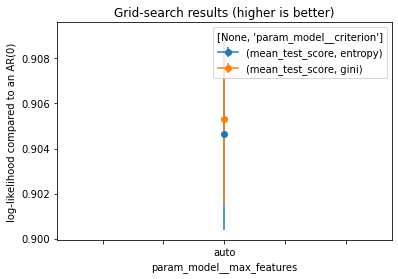

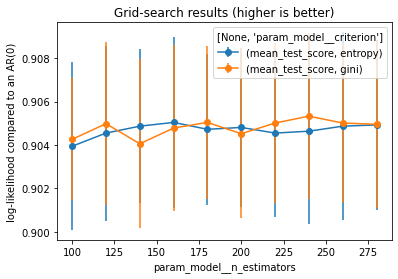

In [12]:
plot_results(grid_search_01, index='max_features', columns='criterion')
plot_results(grid_search_01, index='n_estimators', columns='criterion')

In [13]:
best_params = handle_param_names(grid_search_01.best_params_)
best_params

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 240}

In [14]:
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

F1 Score in train set

1.0


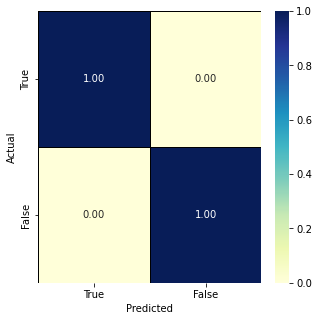

In [15]:
y_pred = grid_search_01.best_estimator_.predict(X_train_resampled)
print(f1_score(y_train_resampled, y_pred, average='micro'))
plot_cf_matrix(y_train_resampled, y_pred)

F1 Score in test set

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7701
           1       0.61      0.49      0.55       958

    accuracy                           0.91      8659
   macro avg       0.77      0.73      0.75      8659
weighted avg       0.90      0.91      0.90      8659

0.9091119066866844


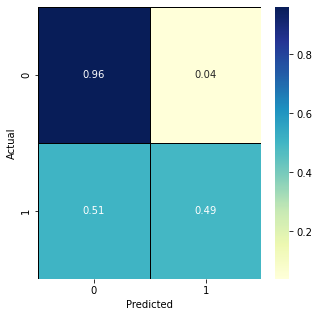

In [30]:
from sklearn.metrics import classification_report

y_pred = grid_search_01.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
plot_cf_matrix(y_test, y_pred)

Sem balanceamento e Kfold


In [12]:
model_01 = RandomForestClassifier(random_state=SEED)
grid_parameters = {
    "n_estimators": range(100, 300, 20),
    "criterion": ["gini", "entropy"],
    
    "max_features": ["auto"],
}

grid_search_01, results_01 = train_and_search(model_01, grid_parameters, X_train, y_train, seed=SEED)
results_01[['rank_test_score', 'params', 'mean_train_score', 'mean_test_score']].sort_values(['mean_test_score', 'mean_train_score'], ascending=False)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters: {'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 280}


,rank_test_score,params,mean_train_score,mean_test_score
9,1,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 280}",1.000000,0.906049
3,2,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 160}",1.000000,0.905991
6,3,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 220}",1.000000,0.905962
2,4,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 140}",0.999997,0.905962
8,5,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 260}",1.000000,0.905847
5,6,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 200}",1.000000,0.905846
7,7,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 240}",1.000000,0.905818
1,8,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 120}",0.999994,0.905818
4,9,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 180}",1.000000,0.905760
10,10,"{'model__criterion': 'entropy', 'model__max_features': 'auto', 'model__n_estimators': 100}",0.999987,0.905384


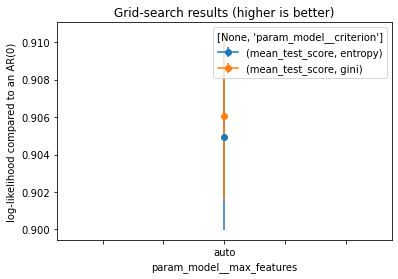

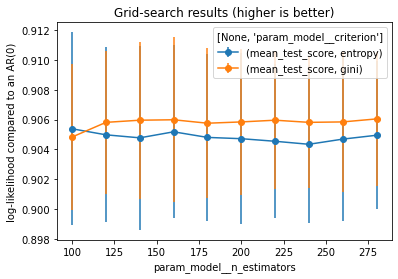

In [13]:
plot_results(grid_search_01, index='max_features', columns='criterion')
plot_results(grid_search_01, index='n_estimators', columns='criterion')

In [14]:
best_params = handle_param_names(grid_search_01.best_params_)
best_params

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 280}

In [15]:
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

F1 Score in train set

1.0


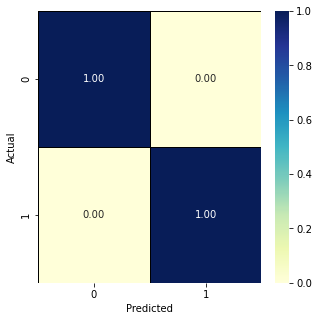

In [16]:
y_pred = grid_search_01.best_estimator_.predict(X_train_resampled)
print(f1_score(y_train_resampled, y_pred, average='micro'))
plot_cf_matrix(y_train_resampled, y_pred)

F1 Score in test set

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7701
           1       0.64      0.42      0.51       958

    accuracy                           0.91      8659
   macro avg       0.79      0.70      0.73      8659
weighted avg       0.90      0.91      0.90      8659

0.9098048273472688


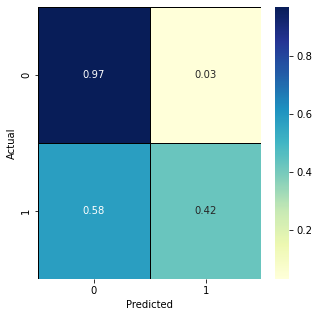

In [17]:
from sklearn.metrics import classification_report

y_pred = grid_search_01.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
plot_cf_matrix(y_test, y_pred)

# Sem balanceamento e Stratified Kfold

In [25]:
model_01 = RandomForestClassifier(random_state=SEED)
grid_parameters = {
    "n_estimators": range(100, 300, 20),
    "criterion": ["gini", "entropy"],
    
    "max_features": ["auto"],
}

grid_search_01, results_01 = train_and_search(model_01, grid_parameters, X_train, y_train, seed=SEED)
results_01[['rank_test_score', 'params', 'mean_train_score', 'mean_test_score']].sort_values(['mean_test_score', 'mean_train_score'], ascending=False)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters: {'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 280}


,rank_test_score,params,mean_train_score,mean_test_score
9,1,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 280}",1.000000,0.906309
7,2,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 240}",1.000000,0.906135
0,3,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 100}",1.000000,0.906106
8,4,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 260}",1.000000,0.906078
3,5,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 160}",1.000000,0.906049
2,6,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 140}",1.000000,0.906049
4,7,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 180}",1.000000,0.905847
6,8,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 220}",1.000000,0.905818
1,9,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 120}",1.000000,0.905731
5,10,"{'model__criterion': 'gini', 'model__max_features': 'auto', 'model__n_estimators': 200}",1.000000,0.905587


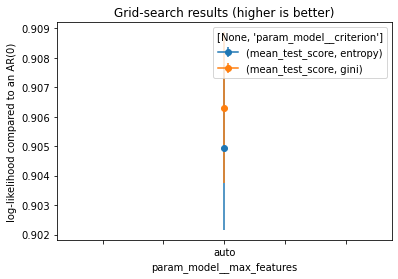

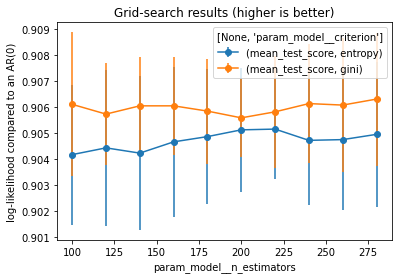

In [26]:
plot_results(grid_search_01, index='max_features', columns='criterion')
plot_results(grid_search_01, index='n_estimators', columns='criterion')

In [27]:
best_params = handle_param_names(grid_search_01.best_params_)
best_params

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 280}

In [28]:
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

F1 Score in train set

1.0


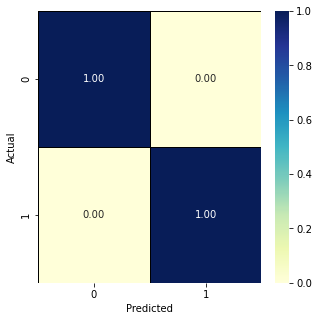

In [29]:
y_pred = grid_search_01.best_estimator_.predict(X_train_resampled)
print(f1_score(y_train_resampled, y_pred, average='micro'))
plot_cf_matrix(y_train_resampled, y_pred)

F1 Score in test set

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7701
           1       0.64      0.42      0.51       958

    accuracy                           0.91      8659
   macro avg       0.79      0.70      0.73      8659
weighted avg       0.90      0.91      0.90      8659

0.9098048273472688


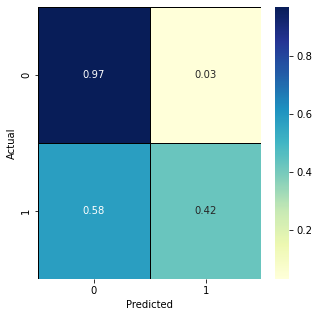

In [30]:
from sklearn.metrics import classification_report

y_pred = grid_search_01.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
plot_cf_matrix(y_test, y_pred)

In [31]:
0.9091119066866844 - 0.9098048273472688

-0.0006929206605843508

In [34]:
pd.set_option('max_colwidth', 400)
pd.set_option('display.max_rows', 500)

In [36]:
results_01

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model__criterion', 'param_model__max_features',
       'param_model__n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
results_01

In [96]:
def train_and_search(model, param_grid, X_train, y_train, metric="f1_micro", seed=42, search_type="grid", n_jobs=-1, verbose=10, 
                     sampler=None, folds=None, n_repeats=3):
    if not folds:
        folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
    # kf = KFold(n_splits=10, random_state=seed, shuffle=True) 

    # using a specif pipeline for unbalanced datasets and undersampling of the most frequent classes
    imba_pipeline = Pipeline(steps=[
                                    ('sampler', sampler),
                                    ('model', model)
                                ]
                            )   

    new_param_grid = {'model__' + key: param_grid[key] for key in param_grid}

    # params = {"estimator": imba_pipeline,
    params = {"estimator": imba_pipeline,
              "param_grid": new_param_grid,
              "scoring": metric,
              "n_jobs": n_jobs,
              "verbose": verbose,
              "return_train_score": True,
              "cv": folds
            }

    if search_type == "grid":
        search = GridSearchCV(**params)
    else:
        search = RandomizedSearchCV(**params)
    for train_ix, test_ix in search.cv.split(X_train, y_train):
        model_obj = model(**params)
        X_train_fold, X_val_fold = X_train[train_ix], X_train[test_ix]
        y_train_fold, y_val_fold = y_train[train_ix], y_train[test_ix]
        # summarize train and test composition
        train_0, train_1 = len(y_train_fold[y_train_fold==0]), len(y_train_fold[y_train_fold==1])
        val_0, val_1 = len(y_val_fold[y_val_fold==0]), len(y_val_fold[y_val_fold==1])
        print('>After resampler - Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, val_0, val_1))

    # search.fit(X_train, y_train)
    # print(f'Best parameters: {search.best_params_}')
    # results = pd.DataFrame(search.cv_results_)
    # return search, results

In [101]:
folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED) 
imba_pipeline = Pipeline(steps=[
                                    ('sampler', SMOTE(random_state=SEED) ),
                                    ('model', RandomForestClassifier(random_state=SEED))
                                ]
                            )   

param_grid = {
    "n_estimators": [100, 300],
    "criterion": ["gini"],
    "max_features": ["auto"],
}

new_param_grid = {'model__' + key: param_grid[key] for key in param_grid}

metric = 'f1_score'
n_jobs = -1
verbose = 10

# params = {"estimator": imba_pipeline,
params = {"estimator": imba_pipeline,
            "param_grid": new_param_grid,
            "scoring": metric,
            "n_jobs": n_jobs,
            "verbose": verbose,
            "return_train_score": True,
            "cv": folds
        }

search = GridSearchCV(**params)
for index, (train_ix, test_ix) in enumerate(search.cv.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_ix], X_train.iloc[test_ix]
    y_train_fold, y_val_fold = y_train.iloc[train_ix], y_train.iloc[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(y_train_fold[y_train_fold==0]), len(y_train_fold[y_train_fold==1])
    val_0, val_1 = len(y_val_fold[y_val_fold==0]), len(y_val_fold[y_val_fold==1])
    print('K-fold (%d) >After resampler - Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (index, train_0, train_1, val_0, val_1))
search_space = tuple(product(grid_parameters["n_estimators"], grid_parameters["criterion"], grid_parameters["max_features"]))
scores_valid, params = [], []
for n_estimators, criterion, max_features in tqdm(search_space, desc="Treinamento: "):
    clf = RandomForestClassifier(random_state=SEED)
    cv = KFold(n_splits=10, random_state=SEED, shuffle=True)
    steps = [('over', SMOTE()), ('model', clf)]
    pipeline = Pipeline(steps=steps)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
    print('Max f1: %.3f' % max(scores))

    scores_valid.append(mean(scores))

    params.append(dict(n_estimators=n_estimators, criterion=criterion,max_features=max_features
                    ))

# search.fit(X_train, y_train)
# print(f'Best parameters: {search.best_params_}')
# results = pd.DataFrame(search.cv_results_)
# return search, results


K-fold (0) >After resampler - Train: 0=27500, 1=3671, Test: 0=3056, 1=408
K-fold (1) >After resampler - Train: 0=27500, 1=3671, Test: 0=3056, 1=408
K-fold (2) >After resampler - Train: 0=27500, 1=3671, Test: 0=3056, 1=408
K-fold (3) >After resampler - Train: 0=27500, 1=3671, Test: 0=3056, 1=408
K-fold (4) >After resampler - Train: 0=27500, 1=3671, Test: 0=3056, 1=408
K-fold (5) >After resampler - Train: 0=27500, 1=3672, Test: 0=3056, 1=407
K-fold (6) >After resampler - Train: 0=27501, 1=3671, Test: 0=3055, 1=408
K-fold (7) >After resampler - Train: 0=27501, 1=3671, Test: 0=3055, 1=408
K-fold (8) >After resampler - Train: 0=27501, 1=3671, Test: 0=3055, 1=408
K-fold (9) >After resampler - Train: 0=27501, 1=3671, Test: 0=3055, 1=408


In [ ]:
grid_parameters = {
    "n_estimators": [100, 300],
    "criterion": ["gini"],
    "max_features": ["auto"],
}

from numpy import mean
from tqdm import tqdm 
from itertools import product

def train_and_search(model, grid_parameters, X_train, y_train, seed=SEED):
  search_space = tuple(product(grid_parameters["n_estimators"], grid_parameters["criterion"], grid_parameters["max_features"]))
  scores_valid, params = [], []
  for n_estimators, criterion, max_features in tqdm(search_space, desc="Treinamento: "):
    clf = RandomForestClassifier(random_state=SEED)
    cv = KFold(n_splits=10, random_state=SEED, shuffle=True)
    steps = [('over', SMOTE()), ('model', clf)]
    pipeline = Pipeline(steps=steps)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
    print('Max f1: %.3f' % max(scores))

    scores_valid.append(mean(scores))

    params.append(dict(n_estimators=n_estimators, criterion=criterion,max_features=max_features
                      ))

In [54]:
print("Quantidade de treinamentos que serão efetuados na validação: ", len(search_space))

Quantidade de treinamentos que serão efetuados na validação:  20


In [55]:
print('Mean f1_micro: %.3f' % mean(scores))

Mean f1_micro: 0.904


In [57]:
zipped_results = zip(scores, scores_valid, params)
best_result =  max(zipped_results, key = lambda res: res[1])
best_score_train, best_score_valid, best_params = best_result

print("Melhores parâmetros: ", best_params)
print("Melhor score de validação: ", best_score_valid)

Melhores parâmetros:  {'n_estimators': 140, 'criterion': 'gini', 'max_features': 'auto'}
Melhor score de validação:  0.9048071696902724


In [61]:
ros = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [62]:
import pandas as pd
from sklearn.metrics import classification_report, precision_score
clf_final = RandomForestClassifier(**best_params,
                               random_state=SEED)


clf_final.fit(X_train_resampled, y_train_resampled)

print("Score de teste:", precision_score(y_test, clf_final.predict(X_test), average="micro"))
print(classification_report(y_test, clf_final.predict(X_test)))

Score de teste: 0.9078415521422797
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7701
           1       0.60      0.48      0.54       958

    accuracy                           0.91      8659
   macro avg       0.77      0.72      0.74      8659
weighted avg       0.90      0.91      0.90      8659



              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7701
           1       0.60      0.48      0.54       958

    accuracy                           0.91      8659
   macro avg       0.77      0.72      0.74      8659
weighted avg       0.90      0.91      0.90      8659

0.9078415521422797


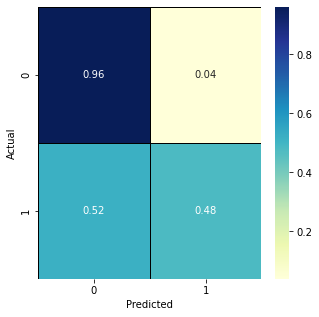

In [63]:
from sklearn.metrics import classification_report

y_pred = clf_final.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
plot_cf_matrix(y_test, y_pred)

In [ ]:
0.9091119066866844 - 0.9098048273472688 0.906455710821111 0.9078415521422797

In [116]:
params_combination = {
    "n_estimators": [100, 300],
    "criterion": ["gini"],
    "max_features": ["auto"],
}
search_space = tuple(product(params_combination))
for teste in tqdm(search_space, desc="Treinamento: "):
    print(teste)

Treinamento: 100%|██████████| 3/3 [00:00<?, ?it/s]

('n_estimators',)
('criterion',)
('max_features',)


In [122]:
from sklearn.base import clone

def score_model(model, X_train, y_train, params, cv=None, sampler=None, seed=42):
    if cv is None:
        cv = KFold(n_splits=10, random_state=seed, shuffle=True)

    if sampler is None:
        sampler = SMOTE(random_state=seed)
    
    results = pd.DataFrame([])
    search_space = tuple(product(params_combination.values())
    for experiment_id, params in enumerate(tqdm(search_space, desc="Treinamento: ")):
        # params = dict(n_estimators=n_estimators, criterion=criterion,max_features=max_features)
        for kf_index, (train_ix, valid_ix) in enumerate(cv.split(X_train, y_train)):
            print(params)
            model_obj = model(random_state=SEED, **params)
            X_train_fold, X_val_fold = X_train[train_ix], X_train[valid_ix]
            y_train_fold, y_val_fold = y_train[train_ix], y_train[valid_ix]
            # summarize train and test composition
            train_0, train_1 = len(y_train_fold[y_train_fold==0]), len(y_train_fold[y_train_fold==1])
            val_0, val_1 = len(y_val_fold[y_val_fold==0]), len(y_val_fold[y_val_fold==1])
            print('K-fold (%d) >Before resampler - Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (kf_index, train_0, train_1, val_0, val_1))
            X_train_fold_resampled, y_train_fold_resampled = sampler.fit_resample(X_train_fold, y_train_fold)
            train_0_resampled, train_1_resampled = len(y_train_fold_resampled[y_train_fold_resampled==0]), len(y_train_fold_resampled[y_train_fold_resampled==1])
            print('K-fold (%d) >After resampler - Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (kf_index, train_0_resampled, train_1_resampled, val_0, val_1))
            model_obj.fit(X_train_fold_resampled, y_train_fold_resampled)
            train_score = f1_score(y_train_fold_resampled, model_obj.predict(X_train_fold_resampled))
            val_score = f1_score(y_val_fold, model_obj.predict(X_val_fold))
            print('Train Score: %.3f' % train_score)
            print('Val Score: %.3f' % val_score)
            results.append({"experiment_id": experiment_id, "params": params, "kfold": kf_index, "train_score": train_score, "val_score": val_score})
        print('Max Val Score: %.3f' % results[results["experiment_id"] == experiment_id][val_score].max())
    return np.array(scores)


In [123]:
model_01 = RandomForestClassifier
grid_parameters = {
    "n_estimators": range(100, 300, 20),
    "criterion": ["gini", "entropy"],
    "max_features": ["auto"],
}
score_model(model_01, X_train.values, y_train.values, grid_parameters, seed=SEED)

Treinamento:   0%|          | 0/2 [00:00<?, ?it/s]

(100, 'gini', 'auto')


TypeError: ABCMeta object argument after ** must be a mapping, not tuple

In [125]:
 tuple(product(grid_parameters.values()))

((range(100, 300, 20),), (['gini', 'entropy'],), (['auto'],))